# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\alvlj\Desktop\ESMT_DSP\Working_Directory\data\movies.csv')

In [126]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [127]:
df.shape

print(df.info())

print(f"DataFrame size: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None
DataFrame size: (9999, 9)


In [128]:
# Display the number of missing data points per column
print(df.isnull().sum())

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [130]:
df['YEAR'] = df['YEAR'].fillna('Unknown')
df['GENRE'] = df['GENRE'].fillna('Unknown')
df['RATING'] = df['RATING'].fillna(df['RATING'].median())
df['VOTES'] = df['VOTES'].fillna(0)

In [131]:
print(df.head())

print(df.isnull().sum())

print(df.info())

                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 7.1   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

**1.4 Drop the duplicated rows**

In [132]:
df = df.drop_duplicates()

In [133]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN


**1.5 Replace the columns names to make them all lowercase**

In [134]:
df.columns = movie_df.columns.str.lower()

In [135]:
df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [136]:
if 'votes' in df.columns:
    df['votes'] = df['votes'].replace({',': ''}, regex=True).astype(float)

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [137]:
average_rating = df['rating'].mean()

In [138]:
print(average_rating)

6.94608068561873


**2.2 What is the maximum runtime?**

In [139]:
max_runtime = df['runtime'].max()

In [140]:
print(max_runtime)

853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [141]:
long_movie = movie_df[df['runtime'] == df['runtime'].max()]

In [142]:
print(long_movie[['movies', 'runtime']])

                        movies  runtime
1902  El tiempo entre costuras    853.0


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

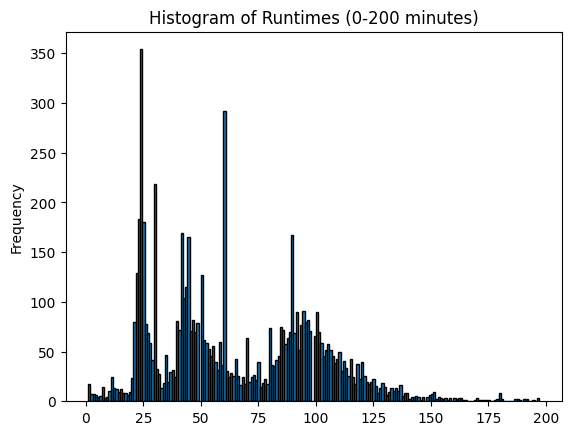

In [143]:
df['runtime'][(df['runtime'] > 0) & (df['runtime'] <= 200)].plot(kind='hist', bins=200, title='Histogram of Runtimes (0-200 minutes)', edgecolor='black')
plt.show()

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [144]:
top_10_votes = df['votes'].quantile(0.9)

In [145]:
print(top_10_votes)

16266.200000000015


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [146]:
df_meta = pd.read_csv(r'C:\Users\alvlj\Desktop\ESMT_DSP\Working_Directory\data\movies_metadata.csv', low_memory=False)

In [147]:
df_meta.columns = df_meta.columns.str.lower()

In [148]:
join_key_movie_df = 'movies' if 'movies' in df.columns else None
join_key_df_meta = 'title' if 'title' in df_meta.columns else None

In [150]:
if join_key_movie_df and join_key_df_meta:
    df = df.dropna(subset=[join_key_movie_df])
    df_meta = df_meta.dropna(subset=[join_key_df_meta])

In [151]:
merge_df = movie_df.merge(df_meta, how='inner', left_on=join_key_movie_df, right_on=join_key_df_meta)


In [152]:
print(merge_df)

                            movies         year  \
0                 The Walking Dead  (2010–2022)   
1                 The Walking Dead  (2010–2022)   
2                          Lucifer  (2016–2021)   
3                  The Good Doctor     (2017– )   
4                     Supernatural  (2005–2020)   
...                            ...          ...   
1741                     Connected          NaN   
1742  How to Win the US Presidency       (2016)   
1743                       Curtain          NaN   
1744                         Metro       (2008)   
1745                         Metro       (2008)   

                                      genre  rating  \
0     \nDrama, Horror, Thriller                 8.2   
1     \nDrama, Horror, Thriller                 8.2   
2       \nCrime, Drama, Fantasy                 8.1   
3                       \nDrama                 8.1   
4      \nDrama, Fantasy, Horror                 8.4   
...                                     ...     ...   
17